In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

In [2]:
plt.style.use('seaborn')

In [3]:
df = pd.read_csv('datasets/Fraud_Data.csv')

In [4]:
#We dont need user_id and device_id. These have no relation to whatever its fraud or not. We'll look at other data later.
df = df.drop(['user_id', 'device_id'], axis=1)

In [5]:
df
#We can salvage signup and purchase time. We can do purch-signup time, turn it into total secs, then scale that using standart scaler.

,signup_time,purchase_time,purchase_value,source,browser,sex,age,ip_address,is_fraud
0,2015-02-24 22:55:49,2015-04-18 2:47:11,34,SEO,Chrome,M,39,7.327584e+08,0
1,2015-06-07 20:39:50,2015-06-08 1:38:54,16,Ads,Chrome,F,53,3.503114e+08,0
2,2015-01-01 18:52:44,2015-01-01 18:52:45,15,SEO,Opera,M,53,2.621474e+09,1
3,2015-04-28 21:13:25,2015-05-04 13:54:50,44,SEO,Safari,M,41,3.840542e+09,0
4,2015-07-21 7:09:52,2015-09-09 18:40:53,39,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...
151107,2015-01-27 3:03:34,2015-03-29 0:30:47,43,SEO,Chrome,M,28,3.451155e+09,1
151108,2015-05-15 17:43:29,2015-05-26 12:24:39,35,SEO,Safari,M,32,2.439047e+09,0
151109,2015-03-03 23:07:31,2015-05-20 7:07:47,40,SEO,IE,F,26,2.748471e+09,0
151110,2015-07-09 20:06:07,2015-09-07 9:34:46,46,SEO,Chrome,M,37,3.601175e+09,0


In [6]:
output = []
for purtime, signtime in zip(df['purchase_time'].values, df['signup_time'].values):
    date_time_obj_pur = datetime.datetime.strptime(purtime, '%Y-%m-%d %H:%M:%S')
    date_time_obj_sign = datetime.datetime.strptime(signtime, '%Y-%m-%d %H:%M:%S')
    minus = date_time_obj_pur - date_time_obj_sign
    output.append(minus.total_seconds())

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaled_times = scaler.fit_transform(np.array(output).reshape(-1,1))

In [8]:
scaled_times

array([[-0.13605658],
       [-1.57187713],
       [-1.57761659],
       ...,
       [ 0.55964341],
       [ 0.06848127],
       [-0.45023111]])

In [9]:
df = df.drop(['signup_time', 'purchase_time'], axis=1)

In [10]:
df['Scale_Time_Factor'] = scaled_times

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [12]:
gender_encoder = LabelEncoder()
gender_ = gender_encoder.fit_transform(df['sex'].values.ravel())
#F -> 0 M -> 1

In [13]:
df['sex'] = gender_

In [14]:
df

,purchase_value,source,browser,sex,age,ip_address,is_fraud,Scale_Time_Factor
0,34,SEO,Chrome,1,39,7.327584e+08,0,-0.136057
1,16,Ads,Chrome,0,53,3.503114e+08,0,-1.571877
2,15,SEO,Opera,1,53,2.621474e+09,1,-1.577617
3,44,SEO,Safari,1,41,3.840542e+09,0,-1.420213
4,39,Ads,Safari,1,45,4.155831e+08,0,-0.182509
...,...,...,...,...,...,...,...,...
151107,43,SEO,Chrome,1,28,3.451155e+09,1,0.105303
151108,35,SEO,Safari,1,32,2.439047e+09,0,-1.279730
151109,40,SEO,IE,0,26,2.748471e+09,0,0.559643
151110,46,SEO,Chrome,1,37,3.601175e+09,0,0.068481


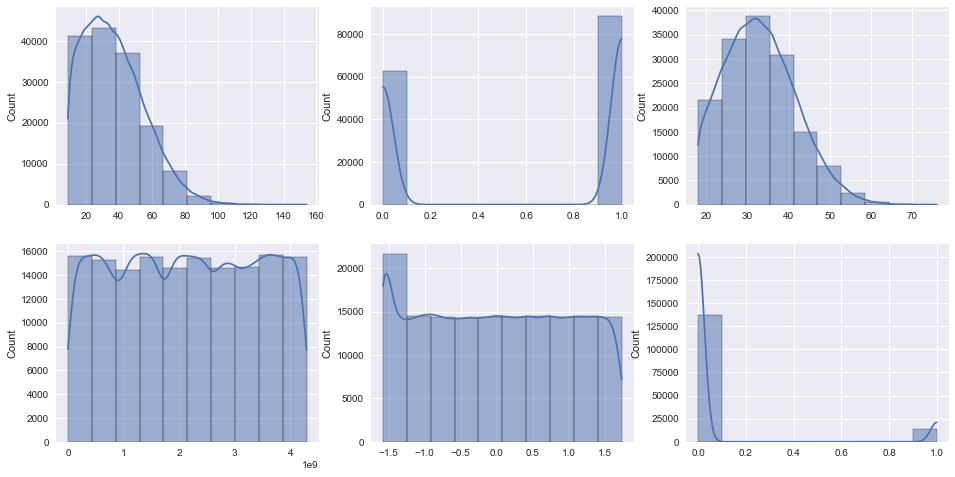

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,8))
count = 0
X_vals = [df.purchase_value.values, df.sex.values, df.age.values, df.ip_address.values, df.Scale_Time_Factor.values, df.is_fraud.values]
for r in range(2):
    for c in range(3):
        sns.histplot(ax=ax[r,c], x=X_vals[count], bins=10, kde=True)
        count += 1
#Classes are imbalanced. We can use SMOTE for this, or use a under-sampler. We'll return to this later.

<AxesSubplot:>

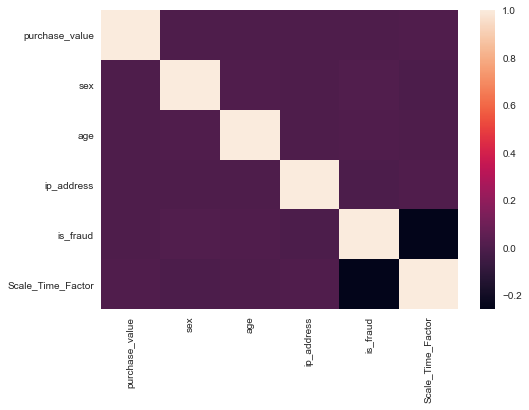

In [16]:
sns.heatmap(df.corr())
#We probably cant expect a good linear model out of this data.

c:\users\shunnie\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


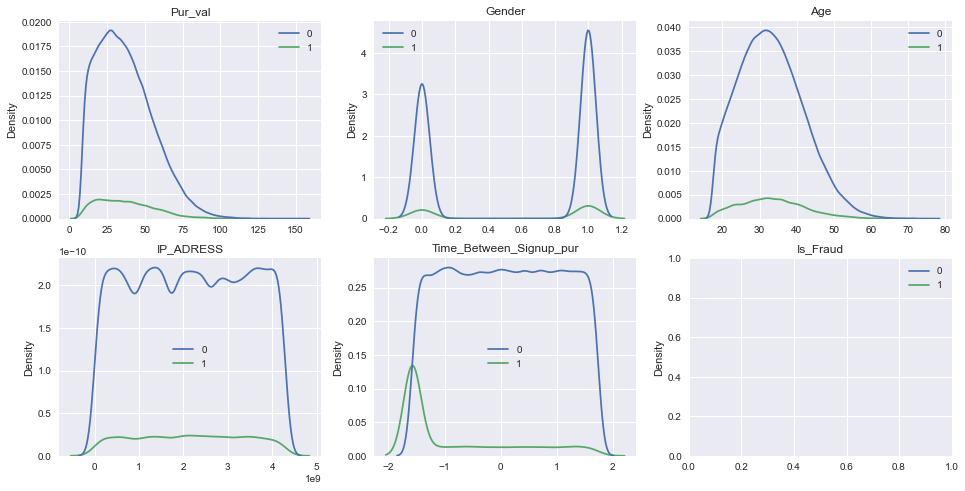

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,8))
count = 0
names = ['Pur_val', 'Gender', 'Age', 'IP_ADRESS', 'Time_Between_Signup_pur', 'Is_Fraud']
X_vals = [df.purchase_value.values, df.sex.values, df.age.values, df.ip_address.values, df.Scale_Time_Factor.values, df.is_fraud.values]
for r in range(2):
    for c in range(3):
        sns.kdeplot(ax=ax[r,c], x=X_vals[count],  hue=df.is_fraud.values).set_title(names[count])
        count += 1

<AxesSubplot:ylabel='Count'>

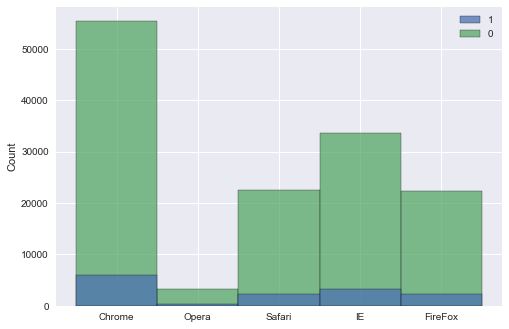

In [18]:
sns.histplot(x=df['browser'].values, hue=df.is_fraud.values, hue_order=[1,0])

<AxesSubplot:ylabel='Count'>

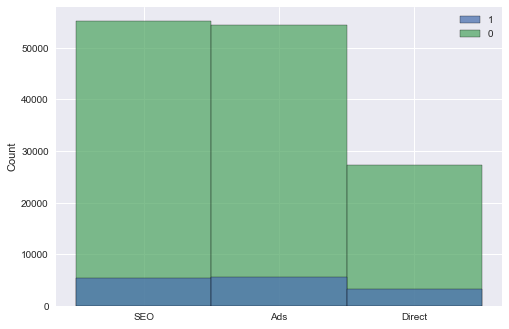

In [19]:
sns.histplot(x=df['source'].values, hue=df.is_fraud.values, hue_order=[1,0])

In [20]:
ohe_source = OneHotEncoder(sparse=False)
ohe_browser = OneHotEncoder(sparse=False)

In [21]:
df_source = ohe_source.fit_transform(df.source.values.reshape(-1,1))

In [22]:
df_browser = ohe_browser.fit_transform(df.browser.values.reshape(-1,1))

In [23]:
df_browser = pd.DataFrame(df_browser,columns=ohe_browser.categories_[0])
df_source = pd.DataFrame(df_source, columns=ohe_source.categories_[0])

In [24]:
df = df.drop(['source', 'browser'], axis=1)

In [25]:
df = pd.concat([df, df_browser, df_source], axis=1)

In [26]:
df

,purchase_value,sex,age,ip_address,is_fraud,Scale_Time_Factor,Chrome,FireFox,IE,Opera,Safari,Ads,Direct,SEO
0,34,1,39,7.327584e+08,0,-0.136057,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,16,0,53,3.503114e+08,0,-1.571877,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,15,1,53,2.621474e+09,1,-1.577617,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,44,1,41,3.840542e+09,0,-1.420213,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,39,1,45,4.155831e+08,0,-0.182509,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,43,1,28,3.451155e+09,1,0.105303,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
151108,35,1,32,2.439047e+09,0,-1.279730,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
151109,40,0,26,2.748471e+09,0,0.559643,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
151110,46,1,37,3.601175e+09,0,0.068481,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:>

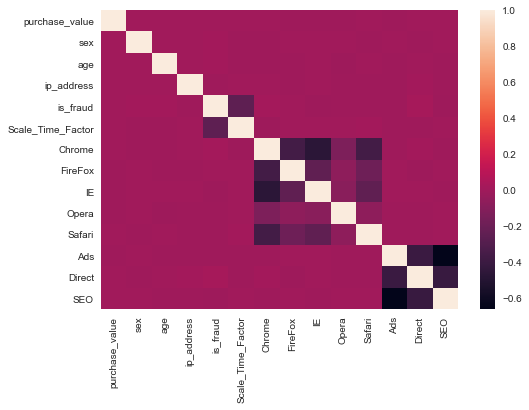

In [27]:
sns.heatmap(df.corr())

In [28]:
#Others columns dont effect Y variable except Scale_Time_Factor. But just to be sure, we'll fit some data and see
#We'll also undersample the data for this test

In [31]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler

In [59]:
X = MinMaxScaler().fit_transform(df.drop(['is_fraud'], axis=1).values)
y = df['is_fraud'].values.reshape(-1,1)

In [60]:
X_sample, y_sample = RandomUnderSampler().fit_resample(X, y)

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2)

In [62]:
def test(x_train, x_test, y_train, y_test, regressor):
    return confusion_matrix(y_test, regressor.fit(x_train, y_train).predict(x_test))

In [63]:
test(x_train, x_test, y_train, y_test, LogisticRegression())

array([[1829,  980],
       [ 824, 2028]], dtype=int64)

In [68]:
test(x_train, x_test, y_train, y_test, AdaBoostClassifier())

array([[2807,    2],
       [1304, 1548]], dtype=int64)

In [69]:
f1_score(y_test, AdaBoostClassifier().fit(x_train, y_train).predict(x_test))

0.7033166742389823

In [70]:
#This time X var will only consist scale_time_factor

In [71]:
X_sample, y_sample = RandomUnderSampler().fit_resample(MinMaxScaler().fit_transform(df['Scale_Time_Factor'].values.reshape(-1,1)), y)

In [72]:
x_train, x_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2)

In [73]:
test(x_train, x_test, y_train, y_test, LogisticRegression())

array([[1855,  957],
       [ 853, 1996]], dtype=int64)

In [74]:
test(x_train, x_test, y_train, y_test, AdaBoostClassifier())

array([[2809,    3],
       [1337, 1512]], dtype=int64)

In [75]:
from sklearn.metrics import f1_score

In [76]:
f1_score(y_test, AdaBoostClassifier().fit(x_train, y_train).predict(x_test))

0.6929422548120989

In [78]:
#As we can see, there are only marginal differences. We can get rid of every other data except our engineered Scale_Time_Factor
#This is a shame, but we cannot do more. We need more meaningful data, theres no way around it.
#For example, if we think about how Logistic Regression works, it works by solving an equation like this
#bias + feature1*weight1+feature2*weight2
#and then it plugs that value into a sigmoid function, and after using a simple binary crossentropy loss
#and using gradient descent, it tries to find the best optimal weights.
#So you need correlation with the target data.

##I'm going to include a "naive_bayes_from_scratch.py" file in the same directory as this file.

In [81]:
#Also, just to try, I'll try ensemble some of the best performing models and we'll see if that makes a difference

In [82]:
from sklearn.ensemble import VotingClassifier

In [83]:
test(x_train, x_test, y_train, y_test, GaussianNB())

array([[1923,  889],
       [ 885, 1964]], dtype=int64)

In [84]:
test(x_train, x_test, y_train, y_test, DecisionTreeClassifier())

array([[1970,  842],
       [ 927, 1922]], dtype=int64)

In [85]:
test(x_train, x_test, y_train, y_test, XGBClassifier())

c:\users\shunnie\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:52:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([[2756,   56],
       [1316, 1533]], dtype=int64)

In [86]:
test(x_train, x_test, y_train, y_test, RandomForestClassifier())

array([[1971,  841],
       [ 927, 1922]], dtype=int64)

In [87]:
rfc = RandomForestClassifier(n_estimators=300)
lr = LogisticRegression()
#By the way, Adaboost uses Decision Tree as the base algorithm to boost
ada = AdaBoostClassifier()

In [88]:
estimators = [('rfc', rfc), ('logr', lr), ('ada', ada)]

In [89]:
vc = VotingClassifier(estimators=estimators, voting='hard')

In [90]:
vc.fit(x_train, y_train)

VotingClassifier(estimators=[('rfc', RandomForestClassifier(n_estimators=300)),
                             ('logr', LogisticRegression()),
                             ('ada', AdaBoostClassifier())])

In [91]:
confusion_matrix(y_test, vc.predict(x_test))

array([[2541,  271],
       [1188, 1661]], dtype=int64)

In [92]:
f1_score(y_test, vc.predict(x_test))

0.6948337167956494

In [93]:
from sklearn.metrics import accuracy_score

In [95]:
accuracy_score(y_test, rfc.fit(x_train, y_train).predict(x_test))

0.6873343932167462

In [96]:
accuracy_score(y_test, vc.predict(x_test))

0.7422716834481541

In [97]:
f1_score(y_test, rfc.predict(x_test))

0.6847167794798718